In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("water_potability.csv") 

In [4]:
data.head(300)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
295,6.139494,236.674026,8081.466471,6.250808,NaN,416.238821,12.777014,106.037222,3.260907,1
296,7.129425,178.372352,25840.578888,7.487823,312.982727,323.298915,16.406156,69.157609,3.418611,1
297,NaN,191.285218,21948.325362,5.626787,355.488766,509.406822,16.691471,84.107738,4.109590,1
298,5.418504,187.776809,35902.715684,4.357088,NaN,454.520296,6.374070,103.373005,4.506540,1


In [5]:
atributData = data.iloc[:,:-1].values
labelData = data.iloc[:,-1].values

In [6]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(atributData[:,:-1])
atributData[:,:-1] = imp_mean.transform(atributData[:,:-1])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(atributData, labelData, test_size=0.33, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6284658040665434

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[607,  70],
       [332,  73]])

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.90      0.75       677
           1       0.51      0.18      0.27       405

    accuracy                           0.63      1082
   macro avg       0.58      0.54      0.51      1082
weighted avg       0.60      0.63      0.57      1082



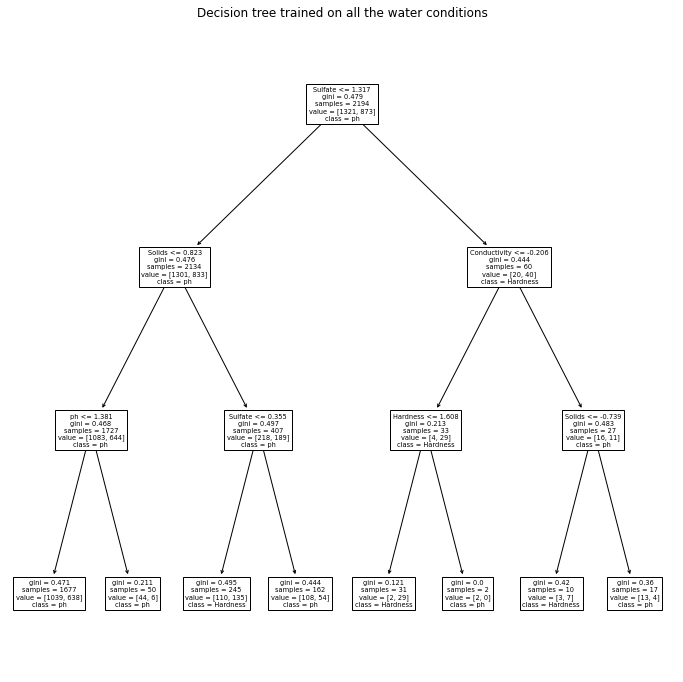

In [15]:
plt.figure(figsize=(12,12))
tree.plot_tree(classifier, feature_names=data.columns.values.tolist(), class_names=data.columns.values.tolist())
plt.title("Decision tree trained on all the water conditions")
plt.show()